# Data Analysis
### Group #

### Importing libraries and all data

In [89]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

plt.style.use("seaborn-whitegrid")

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.


In [90]:
number_of_layers_list = [1, 2, 3, 4]
hidden_layer_sizes_list= [16, 32, 64, 128]

raw_wins = []
raw_scores = []

for n_layers in number_of_layers_list:
    n_wins = []
    n_scores = []
    for size in hidden_layer_sizes_list:
        with open("./data/model"+str(n_layers)+"x"+str(size)+".txt", "r") as f:
            lines = f.readlines()
            n_wins.append(eval(lines[0]))
            n_scores.append(eval(lines[1]))
    raw_wins.append(n_wins)
    raw_scores.append(n_scores)



wins = pd.DataFrame(data=raw_wins,columns=hidden_layer_sizes_list,index=number_of_layers_list)
scores = pd.DataFrame(data=raw_scores,columns=hidden_layer_sizes_list,index=number_of_layers_list)
wins

,16,32,64,128
1,"[[39, 61], [32, 68], [9, 91]]","[[36, 64], [37, 63], [17, 83]]","[[34, 66], [40, 60], [15, 85]]","[[38, 62], [39, 61], [12, 88]]"
2,"[[47, 53], [39, 61], [10, 90]]","[[48, 52], [41, 59], [15, 85]]","[[40, 60], [39, 61], [15, 85]]","[[48, 52], [35, 65], [12, 88]]"
3,"[[33, 67], [41, 59], [9, 91]]","[[45, 55], [40, 60], [10, 90]]","[[36, 64], [37, 63], [11, 89]]","[[40, 60], [37, 63], [15, 85]]"
4,"[[48, 52], [41, 59], [13, 87]]","[[40, 60], [36, 64], [10, 90]]","[[42, 58], [39, 61], [14, 86]]","[[36, 64], [45, 55], [10, 90]]"


In [91]:
def percent_won(a):
     return sum([x[0] for x in a])/3
wins_percent_won = wins.applymap(percent_won)
wins_percent_won

,16,32,64,128
1,26.666667,30.000000,29.666667,29.666667
2,32.000000,34.666667,31.333333,31.666667
3,27.666667,31.666667,28.000000,30.666667
4,34.000000,28.666667,31.666667,30.333333


In [92]:
def percent_won_per_bot(a):
    return [x[0]/100 for x in a]

wins.applymap(percent_won_per_bot)

,16,32,64,128
1,"[0.39, 0.32, 0.09]","[0.36, 0.37, 0.17]","[0.34, 0.4, 0.15]","[0.38, 0.39, 0.12]"
2,"[0.47, 0.39, 0.1]","[0.48, 0.41, 0.15]","[0.4, 0.39, 0.15]","[0.48, 0.35, 0.12]"
3,"[0.33, 0.41, 0.09]","[0.45, 0.4, 0.1]","[0.36, 0.37, 0.11]","[0.4, 0.37, 0.15]"
4,"[0.48, 0.41, 0.13]","[0.4, 0.36, 0.1]","[0.42, 0.39, 0.14]","[0.36, 0.45, 0.1]"


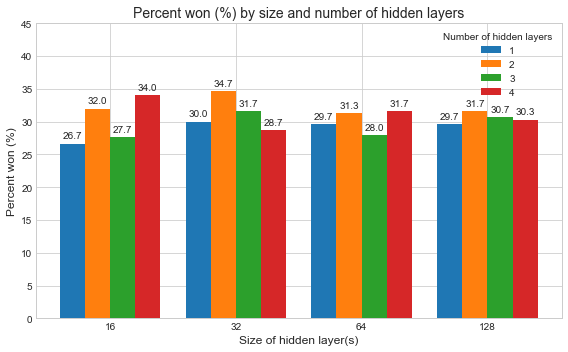

In [93]:
x = np.arange(len(wins_percent_won.columns.values))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
ax.set_ylim([0, 45])
rects1 = ax.bar(x - width, wins_percent_won.loc[1], width, label='1')
rects2 = ax.bar(x, wins_percent_won.loc[2], width, label='2')
rects3 = ax.bar(x + width, wins_percent_won.loc[3], width, label='3')
rects4 = ax.bar(x + width*2, wins_percent_won.loc[4], width, label='4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent won (%)', fontsize = 12)
ax.set_xlabel('Size of hidden layer(s)', fontsize = 12)
ax.set_title('Percent won (%) by size and number of hidden layers', fontsize = 14)
ax.set_xticks(x+width/2, wins_percent_won.columns.values)
ax.legend(title="Number of hidden layers")

ax.bar_label(rects1, labels=[f"{i:.1f}" for i in wins_percent_won.loc[1]], padding=3)
ax.bar_label(rects2, labels=[f"{i:.1f}" for i in wins_percent_won.loc[2]], padding=3)
ax.bar_label(rects3, labels=[f"{i:.1f}" for i in wins_percent_won.loc[3]], padding=3)
ax.bar_label(rects4, labels=[f"{i:.1f}" for i in wins_percent_won.loc[4]], padding=3)

fig.tight_layout()
# fig.savefig('test2png.png', dpi=200)

plt.show()

In [94]:
def total_won(a):
    return sum([x[0] for x in a])
wins_total_won = wins.applymap(total_won)
wins_total_won

,16,32,64,128
1,80,90,89,89
2,96,104,94,95
3,83,95,84,92
4,102,86,95,91


In [95]:
data_expanded = []
for a,b in wins_total_won.iterrows():
    for c in [16,32,64,128]:
        for i in range(b[c]):
            data_expanded.append([c,a,1])
        for i in range(300-b[c]):
            data_expanded.append([c,a,0])

wins_expanded = pd.DataFrame(data=data_expanded,columns=["size_layers","n_layers","result"])
wins_expanded

,size_layers,n_layers,result
0,16,1,1
1,16,1,1
2,16,1,1
3,16,1,1
4,16,1,1
...,...,...,...
4795,128,4,0
4796,128,4,0
4797,128,4,0
4798,128,4,0


In [96]:
def remainder(a):
    return 1200 - a

total_sizes = wins_total_won.sum(axis=0).to_frame()
total_sizes['losses'] = total_sizes.applymap(remainder)
total_sizes

,0,losses
16,361,839
32,375,825
64,362,838
128,367,833


In [97]:
total_n = wins_total_won.sum(axis=1).to_frame()
total_n['losses'] = total_n.applymap(remainder)
total_n

,0,losses
1,348,852
2,389,811
3,354,846
4,374,826


In [104]:
chi2_contingency(total_sizes)

(0.4823799704243441,
 0.9227450483090344,
 3,
 array([[366.25, 833.75],
        [366.25, 833.75],
        [366.25, 833.75],
        [366.25, 833.75]]))

In [105]:
chi2_contingency(total_n)

(4.168509601854363,
 0.24383364273621574,
 3,
 array([[366.25, 833.75],
        [366.25, 833.75],
        [366.25, 833.75],
        [366.25, 833.75]]))